# BUSINESS CASE : Delhivery

### Goals:

1. To clean (by removing unnecessary data), sanitize (by handling missing values and outliers) and manipulate data (extracting new features) to get useful insights out of raw fields

2. To analyze and make sense out of the raw data and help the data science team to build forecasting models on it

### Importing necessary libraries

In [1]:
import math
from datetime import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import ttest_rel
from statsmodels.stats.power import TTestPower

### Reading the CSV file and creating a dataframe

In [2]:
df = pd.read_csv(r"D:\01 STUDY MATERIALS\SCALER\Core Module\Delhivery - Biz case\original_delhivery_data.csv")
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## Exploratory Analysis

### Non-graphical Analysis

In [3]:
#Checking the shape of the data frame
df.shape

(144867, 24)

**Observation:**
- The dataset has 1,44,867 rows and 24 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Observation:**
- The datatype of the time columns can be converted to datetime format
- Only 2 columns have missing values
- The columns related to cutoff and factors are unknown, so they can be dropped off

In [5]:
# Changing datatype of time columns
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [6]:
#Checking the columns with missing values and the count of the missing values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

**Observation:**
- The source name and destination name has some missing values for less than 300 data points which is less than 0.2% of the data, We can drop them off.

#### Handling Missing values

In [7]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [8]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [9]:
# Removing Unknown columns
df.drop(columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace = True)

In [10]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


**Observation:** For a single package delivery there is a lot of segments of datapoints. So it can be grouped together.

In [11]:
# Grouping and aggregating the data to segment level
df_grp = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(data = ('data','first'), 
                                                                     trip_creation_time = ('trip_creation_time','first'), 
                                                                     route_schedule_uuid = ('route_schedule_uuid', 'first'),
                                                                     route_type = ('route_type', 'first'),
                                                                     source_name = ('source_name', 'first'),
                                                                     destination_name = ('destination_name', 'first'),
                                                                     od_start_time = ('od_start_time', 'first'),
                                                                     od_end_time = ('od_end_time', 'last'),
                                                                     start_scan_to_end_scan = ('start_scan_to_end_scan', 'first'), 
                                                                     actual_distance_to_destination = ('actual_distance_to_destination', 'last'), 
                                                                     actual_time = ('actual_time', 'max'), 
                                                                     osrm_time = ('osrm_time', 'max'),
                                                                     osrm_distance = ('osrm_distance', 'max'), 
                                                                     segment_actual_time = ('segment_actual_time', 'sum'), 
                                                                     segment_osrm_time = ('segment_osrm_time', 'sum'),
                                                                     segment_osrm_distance = ('segment_osrm_distance', 'sum')).reset_index()

In [12]:
# Sorting the data within the trip
df_grp.sort_values(by = ['trip_uuid', 'od_start_time'], inplace = True)

In [13]:
# Grouping and aggregating the data to single trip level
trip_df = df_grp.groupby('trip_uuid').agg({'source_center' : 'first',
                                'destination_center' : 'first',
                                'data' : 'first',
                                'trip_creation_time' : 'first',
                                'route_schedule_uuid' : 'first',
                                'route_type' : 'first', 
                                'source_name' : 'first',
                                'destination_name' : 'last',
                                'od_start_time' : 'first',
                                'od_end_time' : 'last',
                                'start_scan_to_end_scan' : 'sum',
                                'actual_distance_to_destination' : 'sum',
                                'actual_time' : 'sum',
                                'osrm_time' : 'sum',
                                'osrm_distance' : 'sum', 
                                'segment_actual_time' : 'sum',
                                'segment_osrm_time' : 'sum',
                                'segment_osrm_distance' : 'sum'}).reset_index()

### Feature Extraction

In [14]:
# Extraction of State, city and place from the source name
trip_df['source_state'] = trip_df['source_name'].str.extract('\((.+)\)')
trip_df['source_city'] = trip_df['source_name'].apply(lambda x : x.split('_')[0])
trip_df['source_place'] = trip_df['source_name'].apply(lambda x : x.split('_')[1] if len(x.split('_')) > 2 else np.nan)

In [15]:
# Extraction of State, city and place from the destination name
trip_df['destination_state'] = trip_df['destination_name'].str.extract('\((.+)\)')
trip_df['destination_city'] = trip_df['destination_name'].apply(lambda x : x.split('_')[0])
trip_df['destination_place'] = trip_df['destination_name'].apply(lambda x : x.split('_')[1] if len(x.split('_')) > 2 else np.nan)

In [16]:
# Extraction of day, month and year out of trip_creation_time
trip_df['trip_creation_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_creation_month'] = trip_df['trip_creation_time'].dt.month
trip_df['trip_creation_year'] = trip_df['trip_creation_time'].dt.year

In [17]:
# Extraction of order duration from the difference between od_end_time and od_start_time
trip_df['calc_od_duration'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds() / 60

In [18]:
trip_df[['calc_od_duration', 'start_scan_to_end_scan']]

,calc_od_duration,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14782,405.485842,257.0
14783,60.590521,60.0
14784,422.119867,421.0
14785,348.512862,347.0


**Observation:**
- There is a mismatch in duration in some rows, which means the actual duration is more than the duration provided in the data.

<AxesSubplot:xlabel='calc_od_duration', ylabel='start_scan_to_end_scan'>

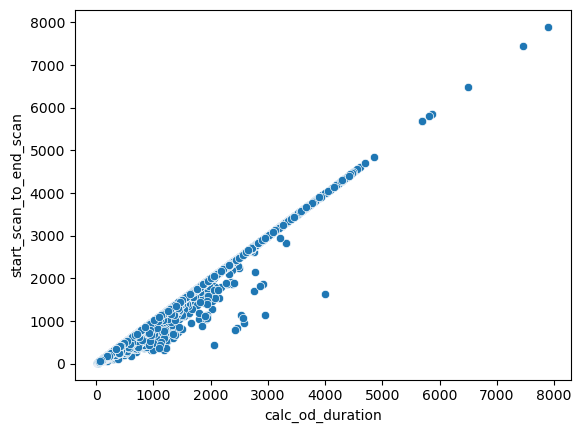

In [19]:
# Confirming the above observation using visual analysis
sns.scatterplot(data = trip_df, x = 'calc_od_duration', y = 'start_scan_to_end_scan')

**Observation:**
- It is confirmed that there is a huge difference in the duration in some rows.

Let's confirm the above observation statistically with a significance level  $\alpha = 0.05$.

In [20]:
alpha = 0.05

Let's first frame the null and alternate hypothesis for this problem statement.

>$H_0$ : Average duration of an order(calculated) is equal to the average duration of an order(provided) $( \mu_1 = \mu_2 )$

>$H_a$ : Average duration of an order(calculated) is greater than the average duration of an order(provided) $( \mu_1 > \mu_2 )$

where $\mu_1$ is the mean duration of an order(calculated), $\mu_2$ is the mean duration of an order(provided)

Since both the columns are dependent, student's T-test for related samples would be appropriate for this.

In [21]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_rel(trip_df['calc_od_duration'], trip_df['start_scan_to_end_scan'], alternative = 'greater')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 26.82006931528117
P-value : 4.625246491713765e-155
alpha : 0.05
Reject H0


**Observation:**
- It is statistically proved that the actual duration of an order delivery is significantly greater than the duration provided in the data with a confidence level of 95%

**Recommendation:**
- It is recommended to check and improve the data logging method for the time duration of an order delivery.
- It is recommended to build the forecating model based on the calculated duration

In [22]:
# The 'start_scan_to_end_scan' column has mismatch from the actual duration and 
# we have calculated the actual duaration, the 'start_scan_to_end_scan' column can be dropped
trip_df.drop(columns = ['start_scan_to_end_scan'], inplace = True)

In [23]:
trip_df.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'source_name', 'destination_name', 'od_start_time', 'od_end_time',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'calc_od_duration'],
      dtype='object')

In [24]:
# Let's remove the old columns from which we extracted the data
trip_df.drop(columns = ['source_name', 'destination_name', 'od_start_time', 'od_end_time'], inplace = True)

### Visual Analysis

#### Univariate Analysis

In [25]:
# Creating lists of column names based on the type
cat_cols = ['route_type','source_state', 'source_city', 'destination_state', 
            'destination_city', 'trip_creation_month']
num_cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 
            'segment_actual_time', 'segment_osrm_time','segment_osrm_distance', 'calc_od_duration']

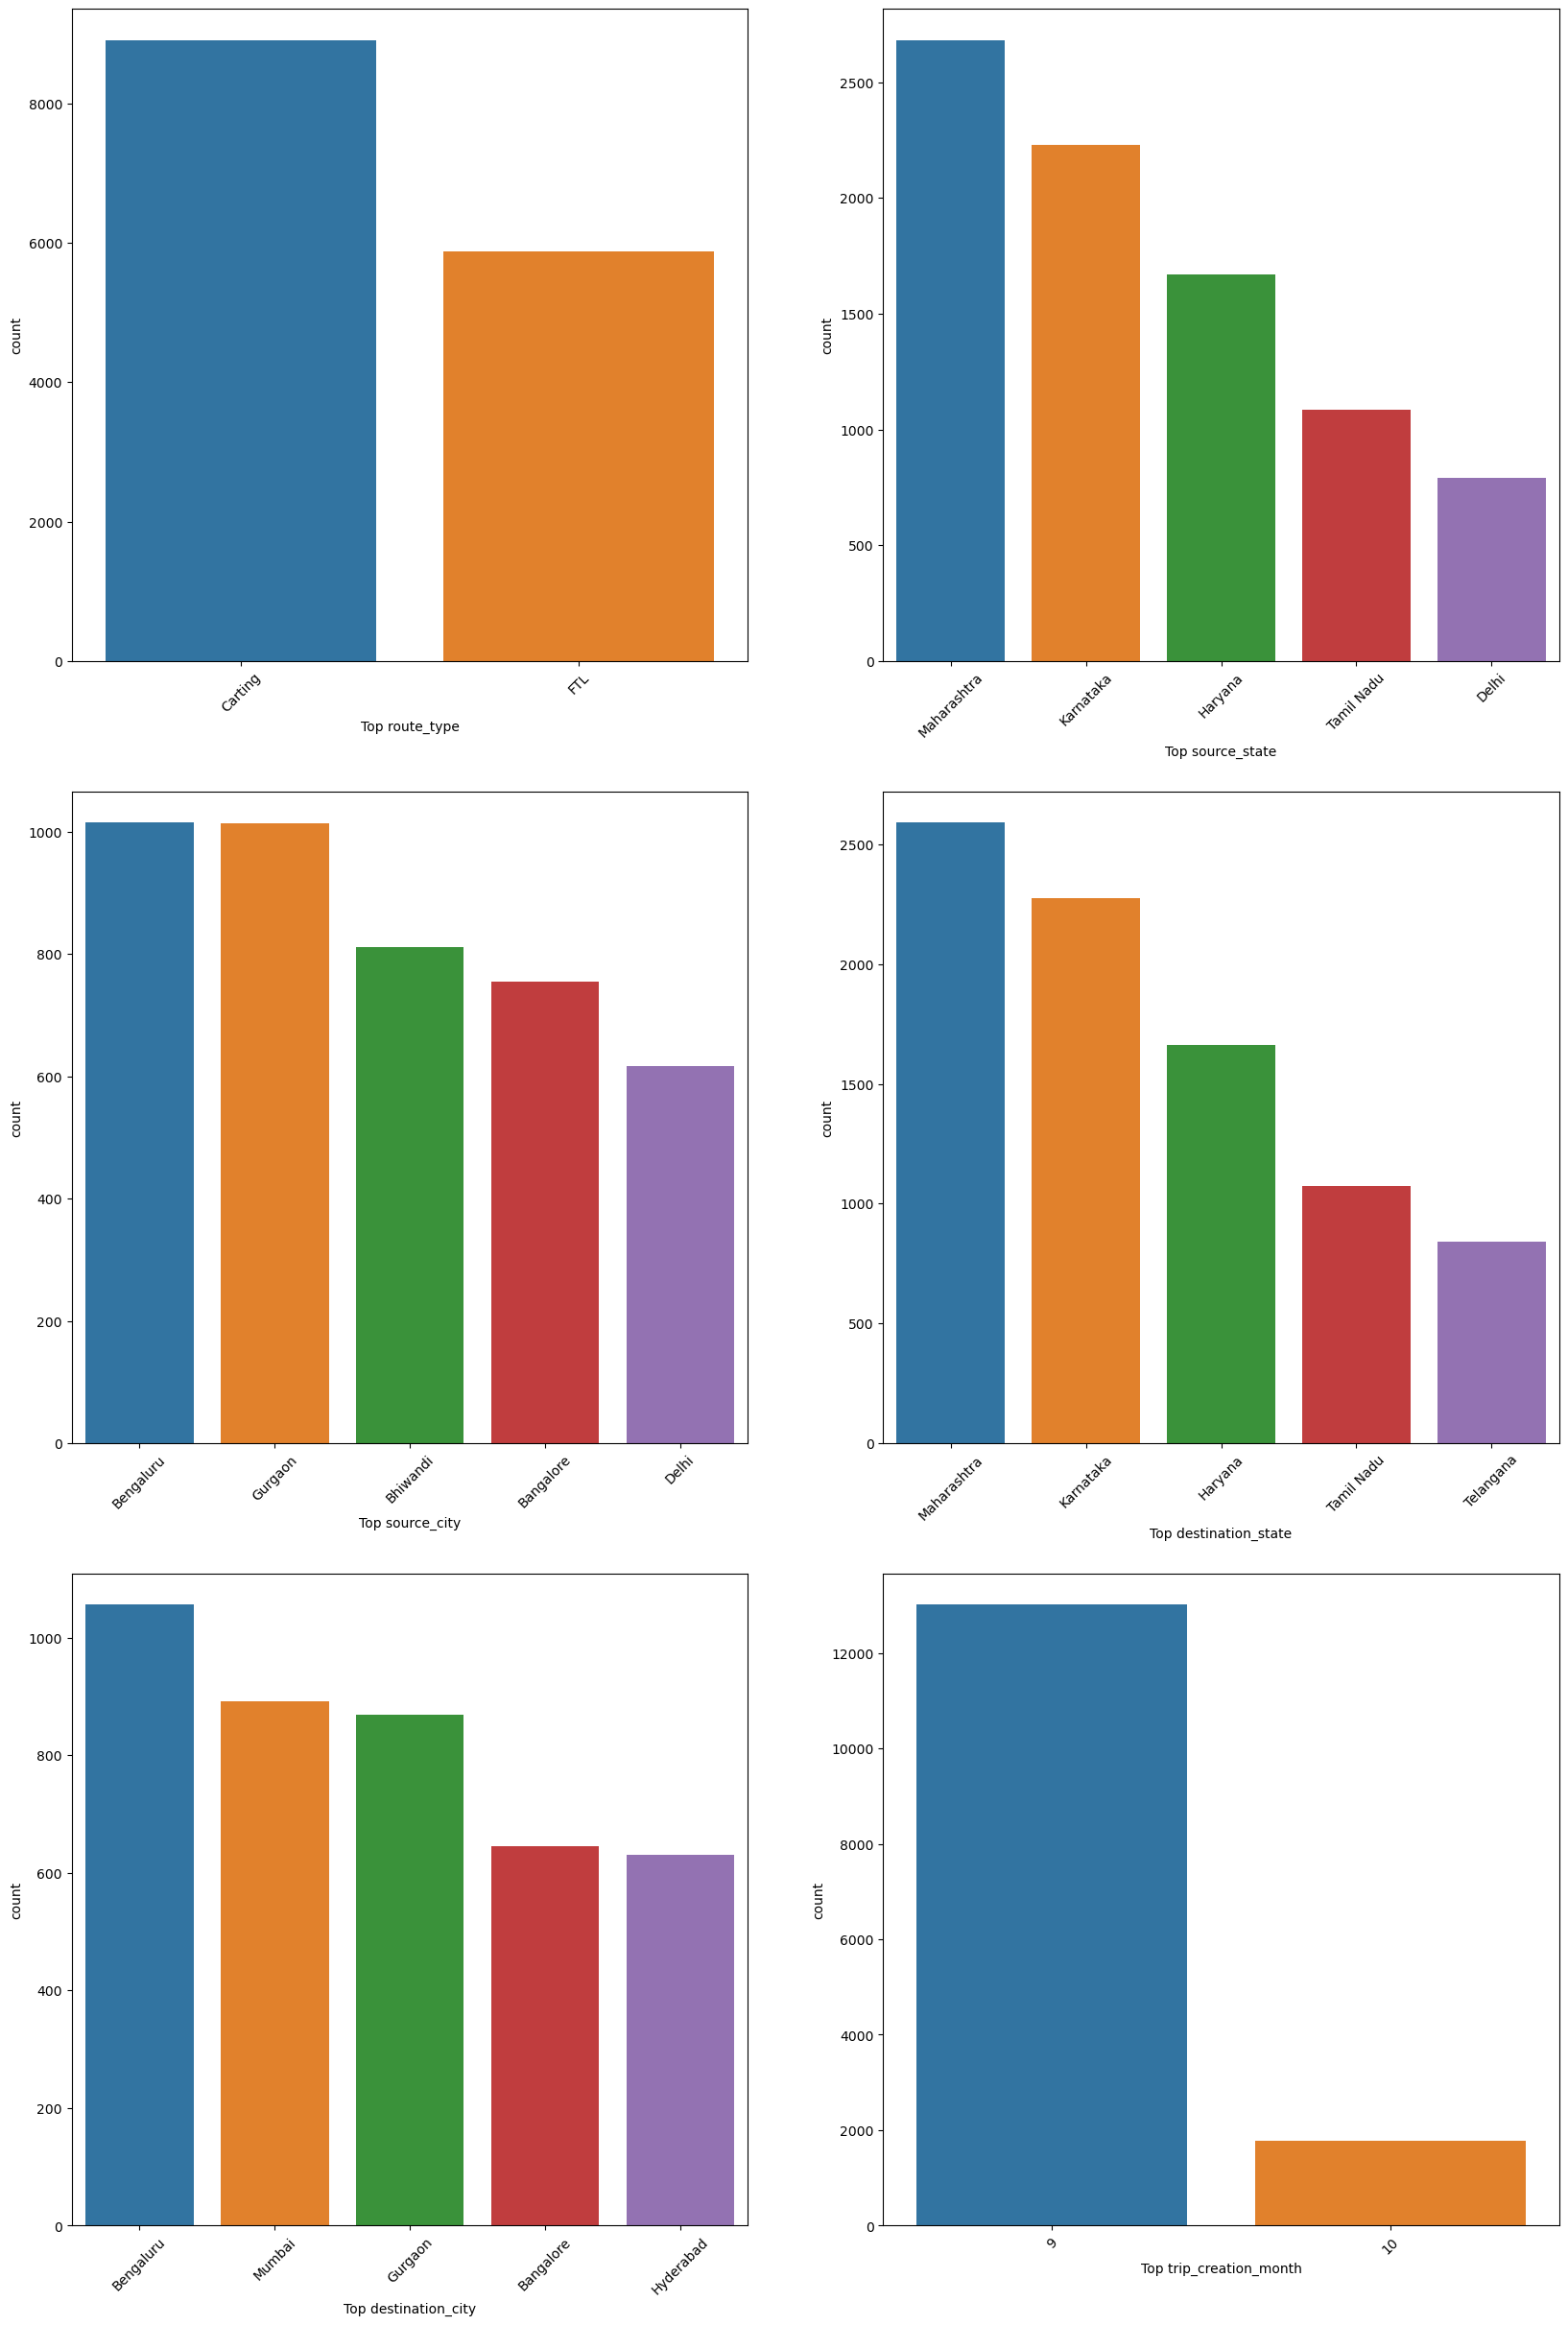

In [26]:
# Univariate analysis of categorical columns
plt.figure(figsize = [20,30])
for i in range(len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(data = trip_df, x = cat_cols[i], order = trip_df[cat_cols[i]].value_counts().index[:5])
    plt.xticks(rotation = 45)
    plt.xlabel("Top " + cat_cols[i] )
plt.show()

**Observation:**
- Carting type of orders are more than the FTL type of orders
- Maharashtra, Karnataka, Haryana, and Tamilnadu are the states with high number of orders in both directions (source and destination)
- Bengaluru is the top city with most number of orders in both directions (source and direction)

**Recommendation:**
- It is recommended to ensure the resources availability to handle the orders in top busy city - Bengaluru & top busy states - Maharashtra, Karnataka, Haryana, and Tamilnadu

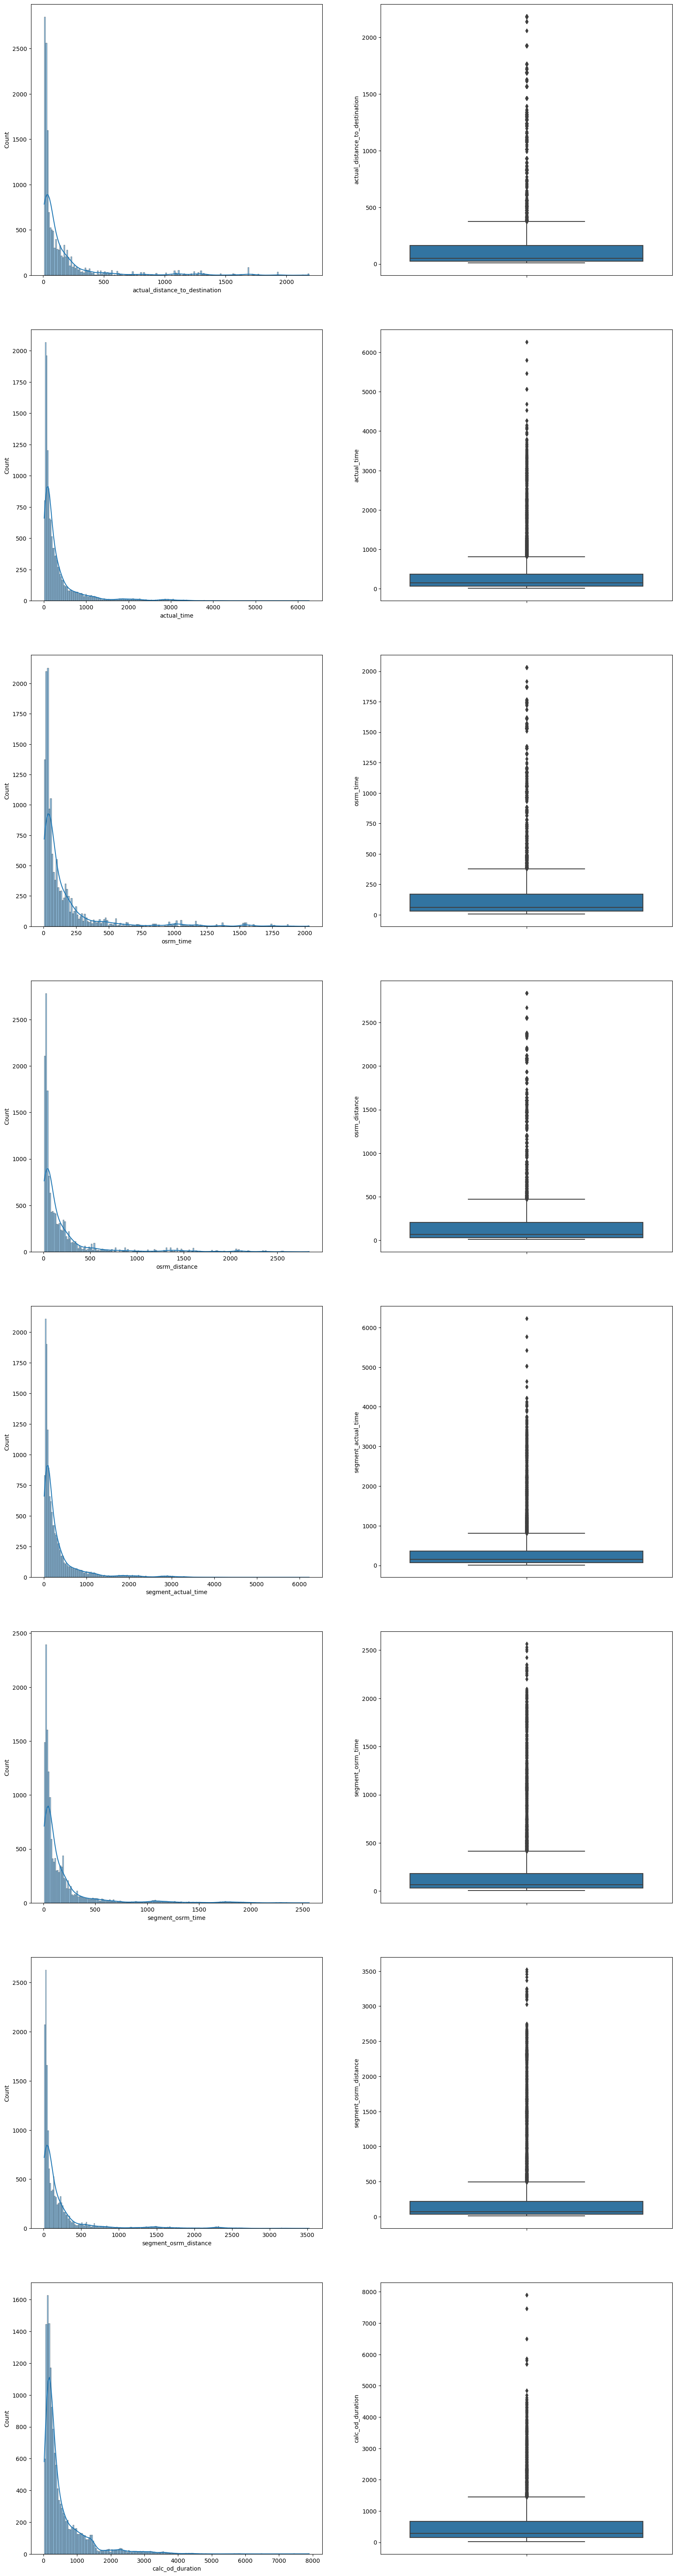

In [27]:
# Univariate analysis of Numerical columns
plt.figure(figsize = [20,80])
for i in range(len(num_cols)):
    plt.subplot(8,2,2*i+1)
    sns.histplot(data = trip_df, x = num_cols[i], kde = True)
    plt.subplot(8,2,2*i+2)
    sns.boxplot(data = trip_df, y = num_cols[i])
plt.show()

**Observation:**
- The distribution of all the numerical columns are right skewed and also all of them has outliers. So it is clear that the skewness is caused by the outliers. The outliers in the numerical columns need to be treated

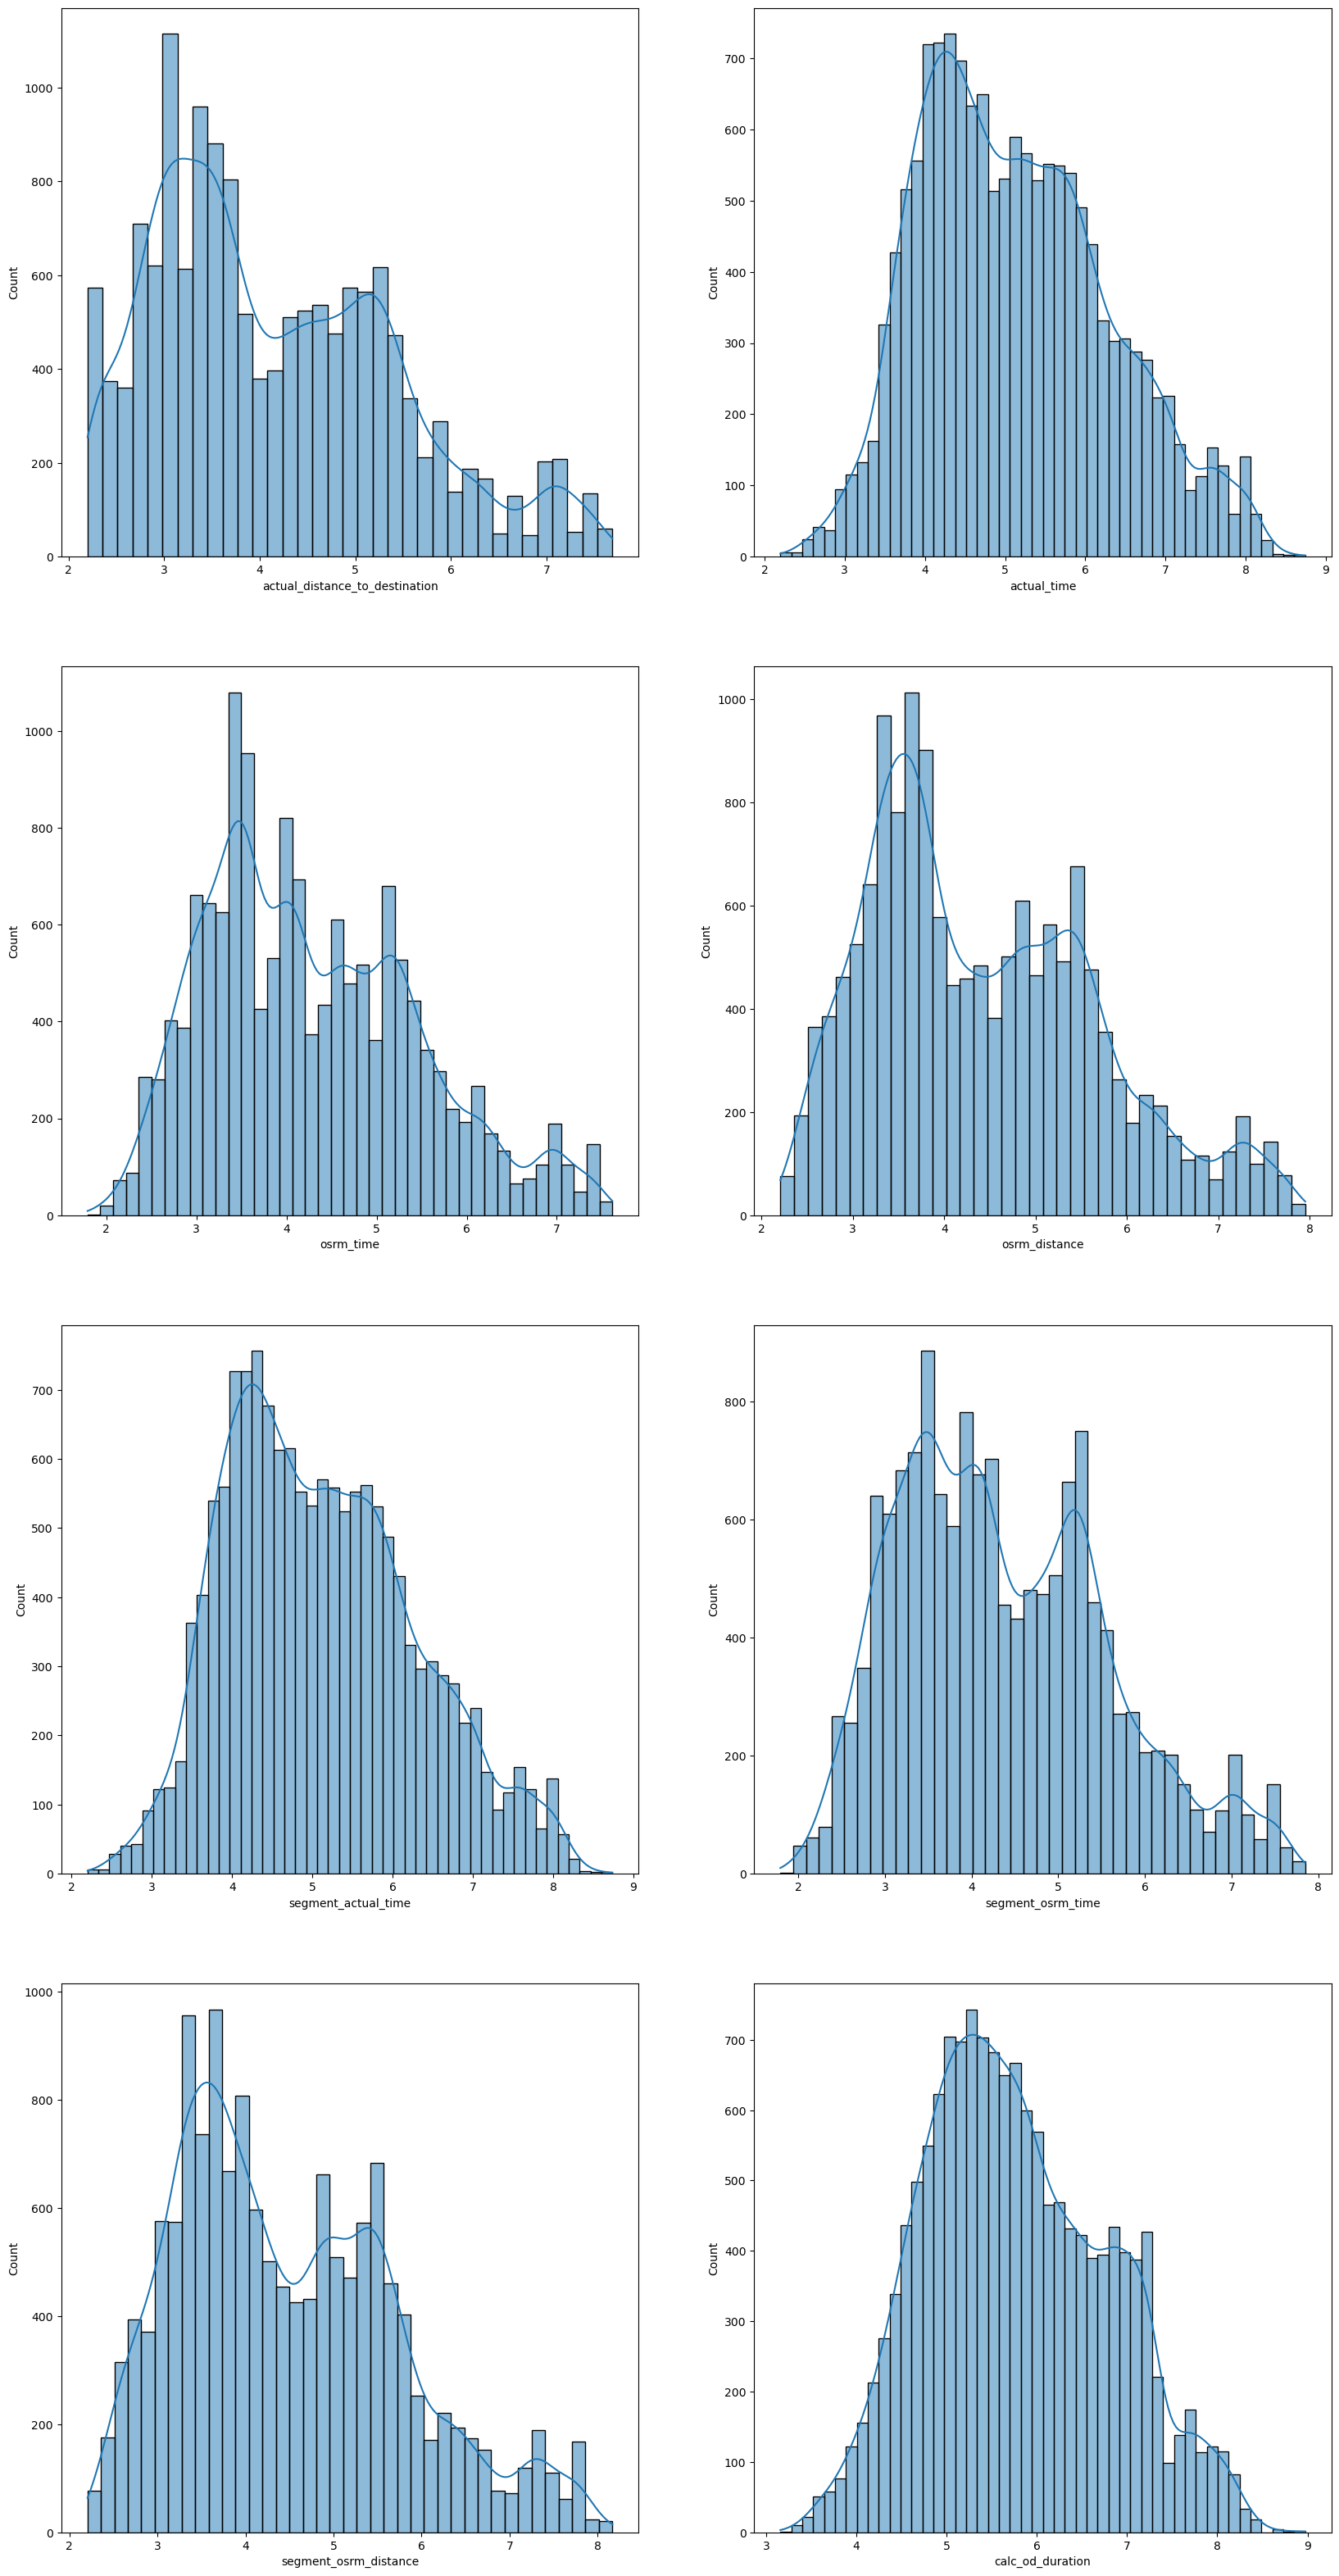

In [28]:
# Let's check the log normal transformation of numerical columns before handling the outliers
plt.figure(figsize = [20,40])
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.histplot(np.log(trip_df[num_cols[i]]), kde = True)
plt.show()

**Observation:**
- The distribution of the numerical columns are not looking normal, even after doing log transformation.

#### Handling Outliers

In [29]:
# Removing the outliers using IQR method
q1 = trip_df[num_cols].quantile(0.25)
q3 = trip_df[num_cols].quantile(0.75)
iqr = q3 - q1
up_lim = q3 + (1.5*iqr)
low_lim = q1 - (1.5*iqr)
trip_df.drop(trip_df[((trip_df[num_cols] > up_lim) | (trip_df[num_cols] < low_lim)).any(axis = 1)].index, inplace = True)

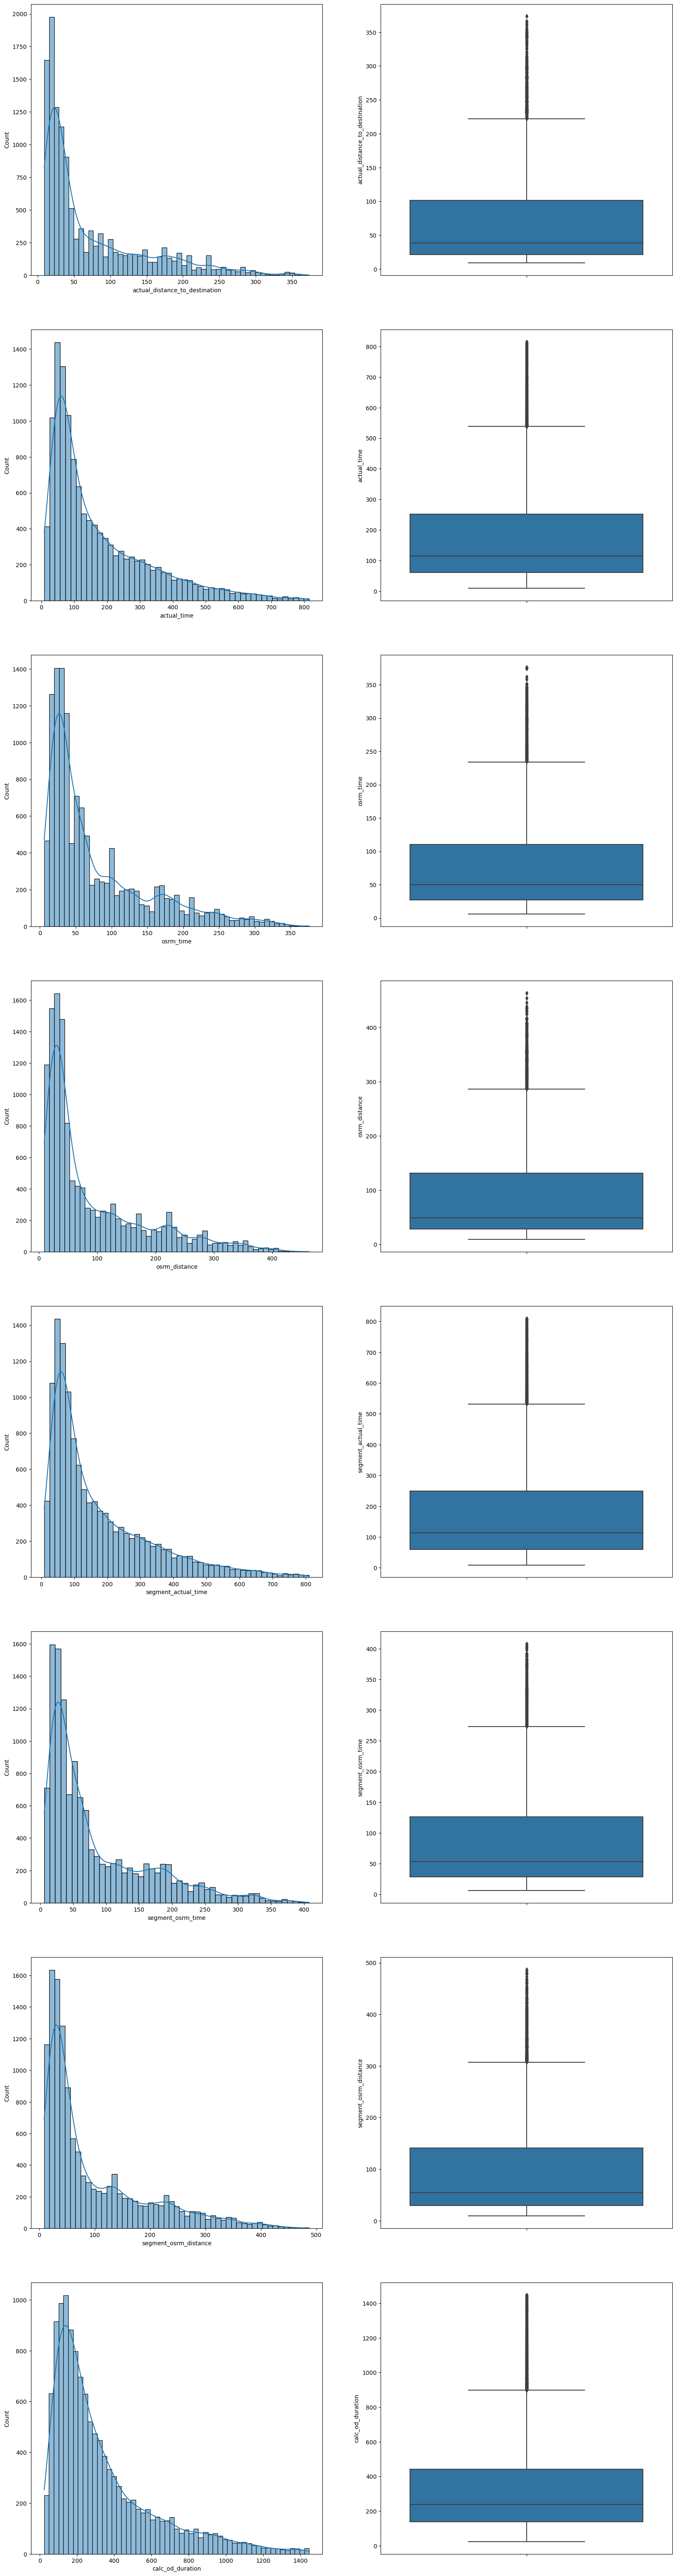

In [30]:
# Univariate analysis of numerical columns after handling the outliers
plt.figure(figsize = [20,80])
for i in range(len(num_cols)):
    plt.subplot(8,2,2*i+1)
    sns.histplot(data = trip_df, x = num_cols[i], kde = True)
    plt.subplot(8,2,2*i+2)
    sns.boxplot(data = trip_df, y = num_cols[i])
plt.show()

**Observation:**
- The distribution of all the numerical columns still looks right skewed which might be because it is delivery time data. For a delivery time kind of data, the distribution will be mostly right skewed because most of the orders are delivered in a shorter duration

#### Bivariate analysis

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

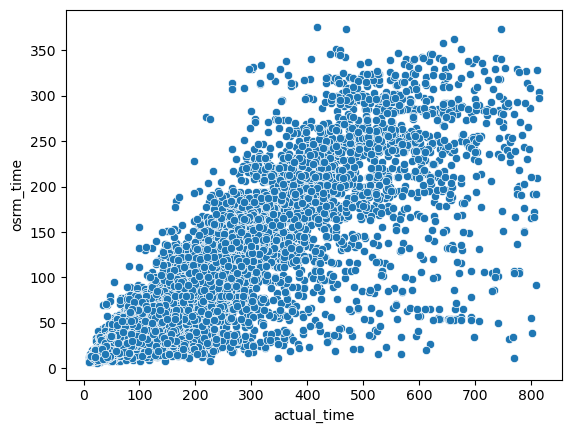

In [31]:
# actual_time aggregated value vs OSRM time aggregated value
sns.scatterplot(data = trip_df, x = 'actual_time', y = 'osrm_time')

**Observation:**
- The actual time and osrm time are not matching in most of the datapoints, which means the time predicted by the osrm engine is not so accurate and also it has huge deviations in some cases as seen in the bottom right quarter of the chart

***Hypothesis Testing***

Let's confirm the above observation statistically with a significance level  $\alpha = 0.05$.

In [32]:
alpha = 0.05

Let's first frame the null and alternate hypothesis for this problem statement.

>$H_0$ : Average of the actual time taken for delivery is equal to the average of the time predicted by the osrm engine $( \mu_1 = \mu_2 )$

>$H_a$ : Average of the actual time taken for delivery is not equal to the average of the time predicted by the osrm engine $( \mu_1 \neq \mu_2 )$

where $\mu_1$ is the mean of the actual time taken for delivery, $\mu_2$ is the mean of the time predicted by the osrm engine

Since both the columns are dependent, two tailed student's T-test for related samples would be appropriate for this.

In [33]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_rel(trip_df['actual_time'], trip_df['osrm_time'], alternative = 'two-sided')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 108.46749464129593
P-value : 0.0
alpha : 0.05
Reject H0


**Observation:**
- The p value is 0 which is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$, which means the average of the actual time taken for delivery is not equal to the average of the time predicted by the osrm engine. Hence the observation that the time predicted by the osrm engine is not accurate, is statistically verified with a confidence of 95%

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

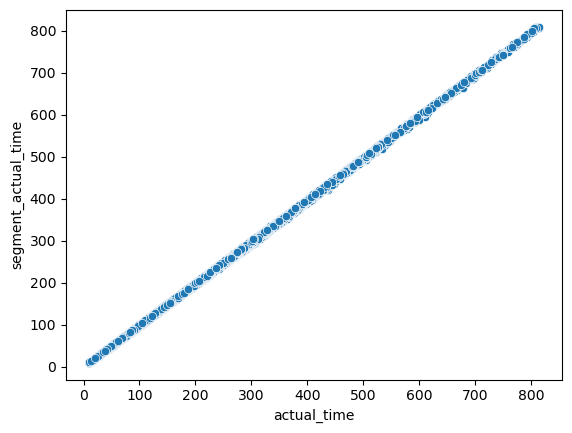

In [34]:
# actual_time aggregated value vs segment actual time aggregated value
sns.scatterplot(data = trip_df, x = 'actual_time', y = 'segment_actual_time')

**Observation:**
- The scatter plot looks like a linear line which means the actual time taken for the delivery in trip level data is equal or very close to the aggregated actual time taken for the delivery from the segment level data.

***Hypothesis Testing***

Let's confirm the above observation statistically with a significance level  $\alpha = 0.05$.

Let's first frame the null and alternate hypothesis for this problem statement.

>$H_0$ : Average of the actual time taken for delivery in trip level data is equal to the average of the actual time taken for the delivery from the segment level data $( \mu_1 = \mu_2 )$

>$H_a$ : Average of the actual time taken for delivery in trip level data is not equal to the average of the actual time taken for the delivery from the segment level data $( \mu_1 \neq \mu_2 )$

where $\mu_1$ is the mean of the actual time taken for delivery in trip level data, $\mu_2$ is the mean of the average of the actual time taken for the delivery from the segment level data

Since both the columns are dependent, two tailed student's T-test for related samples would be appropriate for this.

In [35]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_rel(trip_df['segment_actual_time'], trip_df['actual_time'], alternative = 'two-sided')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : -107.21926103603519
P-value : 0.0
alpha : 0.05
Reject H0


**Observation:**
- The probability comes out to be 0, which is less than the significance level of 0.05, so we will reject the null hypothesis which means the actual time and the aggregated - segment actual time is not the same. Even though we have observed visually that both are almost equal, we could not prove that statistically. This can be possibly a type 1 error. So let's perform a power analysis of this sample to check whether the given number of samples is sufficient to conclude this statistically

In [36]:
# Power Analysis
# For doing the power analysis we need the effect size and it can be calculated by,
# Cohen's d = (M2 - M1) ⁄ SDpooled
# SDpooled = √((SD1**2 + SD2**2) ⁄ 2)
m1 = trip_df['segment_actual_time'].mean()
m2 = trip_df['actual_time'].mean()
sdp = np.sqrt((np.std(trip_df['segment_actual_time'])**2 + np.std(trip_df['actual_time'])**2)/2)

cd = (m2-m1)/sdp # Cohen's d is the effect size

# Calculating the power of the test
t = TTestPower()
power = t.solve_power(effect_size=cd, nobs=trip_df['segment_actual_time'].shape[0], alpha=0.05, power=None, alternative='two-sided')
print('Power :', power)

Power : 0.22054560911977858


**Observation:**
- As we expected, the power of the hypothesis test is too low. It should be atleast 0.8 to get a correct result statistically. This low power is because of the insufficient number of samples. Let's find the number of samples needed to conduct this hypothesis test with a power of 0.8.

In [37]:
# Calculating the number of samples needed to conduct this test
samp = t.solve_power(effect_size=cd, nobs=None, alpha=0.05, power=0.8, alternative='two-sided')
print('Sample size for 0.8 power :', samp)

Sample size for 0.8 power : 70982.04537249292


**Observation:**
- The number of samples required to conduct the test with 0.8 power is 70982. But we have only 12740 (18% of 70982) samples. So we can't conclude that the result of previous hypothesis test to be statistically correct

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

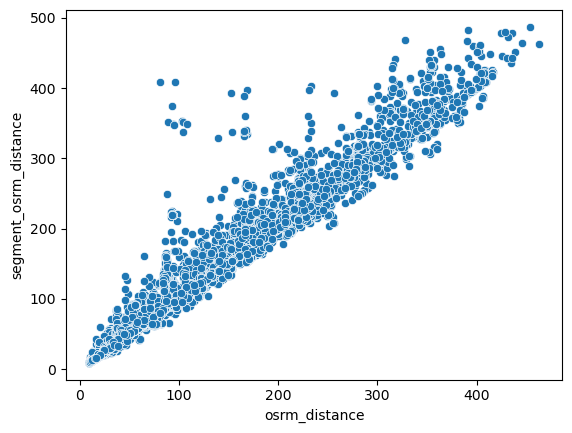

In [38]:
# osrm distance aggregated value vs segment osrm distance aggregated value 
sns.scatterplot(data = trip_df, x = 'osrm_distance', y = 'segment_osrm_distance')

**Observation:**
- The distribution of the datapoints looks linear but thick, which means the distance predicted by the osrm engine in trip level is not the same as the aggregated - distance predicted by the osrm engine in segment level. Also we have huge deviations in some datapoints as seen in top left quadrant.

***Hypothesis Testing***

Let's confirm the above observation statistically with a significance level  $\alpha = 0.05$.

Let's first frame the null and alternate hypothesis for this problem statement.

>$H_0$ : Average of the osrm distance in trip level is equal to the average of the aggregated osrm distance in segment level $( \mu_1 = \mu_2 )$

>$H_a$ : Average of the osrm distance in trip level is not equal to the average of the aggregated osrm distance in segment level $( \mu_1 \neq \mu_2 )$

where $\mu_1$ is the mean of the osrm distance in trip level, $\mu_2$ is the mean of the aggregated osrm distance in segment level

Since both the columns are dependent, two tailed student's T-test for related samples would be appropriate for this.

In [39]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_rel(trip_df['osrm_distance'], trip_df['segment_osrm_distance'], alternative = 'two-sided')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : -36.26177262884167
P-value : 4.2436910544763715e-274
alpha : 0.05
Reject H0


**Observation:**
- The p-value is very low and less than alpha(0.05), so we will reject the null hypothesis that the osrm distance in the trip level is not equal to the aggregated osrm distance in segment level. Hence the observation from the scatter plot is proved statistically.

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

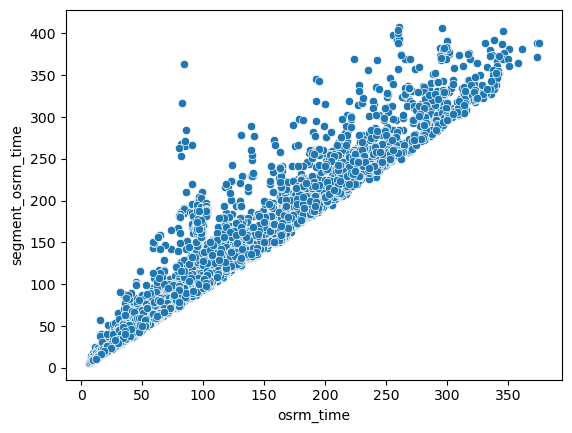

In [40]:
# osrm time aggregated value vs segment osrm time aggregated value
sns.scatterplot(data = trip_df, x = 'osrm_time', y = 'segment_osrm_time')

**Observation:**
- All the points are on or above the diagonal line of the plot which means the aggregated osrm time in the segment level is greater than the osrm time in the trip level.

***Hypothesis Testing***

Let's confirm the above observation statistically with a significance level  $\alpha = 0.05$.

Let's first frame the null and alternate hypothesis for this problem statement.

>$H_0$ : Average of the aggregated osrm time in segment level is less than or equal to the average of the osrm time in trip level $( \mu_1 \leq \mu_2 )$

>$H_a$ : Average of the aggregated osrm time in segment level is greater than the average of the osrm time in trip level $( \mu_1 > \mu_2 )$

where $\mu_1$ is the mean of the aggregated osrm time in segment level, $\mu_2$ is the mean of the osrm time in trip level

Since both the columns are dependent, right tailed student's T-test for related samples would be appropriate for this.

In [41]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_rel(trip_df['segment_osrm_time'], trip_df['osrm_time'], alternative = 'greater')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 44.15761149504297
P-value : 0.0
alpha : 0.05
Reject H0


**Observation:**
- The p-value comes out to be 0, so we will reject the null hypothesis. Hence, it is statistically proved with 95% confidence that the segment osrm time is greater than the osrm time.

### Encoding categorical columns

In [42]:
cat_cols

['route_type',
 'source_state',
 'source_city',
 'destination_state',
 'destination_city',
 'trip_creation_month']

We have the route type column with only two categories, it can be encoded using one hot encoder

In [43]:
encoder = OneHotEncoder()

In [44]:
trip_df[['route_type']] = encoder.fit_transform(trip_df[['route_type']])

In [45]:
trip_df[['route_type']]

,route_type
1,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 1)\t1.0"
5,"(0, 0)\t1.0"
6,"(0, 0)\t1.0"
...,...
14782,"(0, 0)\t1.0"
14783,"(0, 0)\t1.0"
14784,"(0, 0)\t1.0"
14785,"(0, 0)\t1.0"


The route_type column is now encoded with '0' for `carting` and '1' for `FTL` 

### Standardization of Numerical columns

In [46]:
stdzr = StandardScaler()

In [47]:
trip_df[num_cols] = stdzr.fit_transform(trip_df[num_cols])

In [48]:
trip_df[num_cols]

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,calc_od_duration
1,0.012595,-0.218653,-0.150521,-0.081119,-0.222292,-0.263343,-0.145546,-0.555776
3,-0.766379,-0.749694,-0.879858,-0.810677,-0.744152,-0.879330,-0.825147,-0.846440
4,0.767231,1.033086,0.523772,0.606624,1.044175,0.365215,0.515981,1.367501
5,-0.663162,-0.737050,-0.769769,-0.717187,-0.737788,-0.791332,-0.738622,-0.523971
6,-0.878678,-0.970961,-0.907380,-0.896104,-0.966898,-0.917043,-0.908185,-0.855360
...,...,...,...,...,...,...,...,...
14782,-0.201920,-0.597968,-0.233087,-0.210995,-0.597777,-0.301057,-0.349854,0.246426
14783,-0.789486,-0.989927,-0.921141,-0.850726,-0.985990,-0.942186,-0.865178,-0.989429
14784,-0.467238,0.660093,-0.343176,-0.324490,0.668690,0.025794,0.073163,0.306030
14785,0.868411,0.546298,1.445764,0.950844,0.522314,1.697758,1.326906,0.042276


### Summary

#### Insights:
- The dataset has 1,44,867 rows and 24 columns
- The source name and destination name has some missing values for less than 300 data points which is less than 0.2% of the data, We can drop them off.
- There is a mismatch in duration(start scan to end scan) in some rows, which means the actual duration(calc duration) is more than the duration provided in the data.
- It is visually confirmed that there is a huge difference in the duration in some rows.
- It is statistically proved that the actual duration(calc duration) of an order delivery is significantly greater than the duration provided in the data(start scan to end scan) with a confidence level of 95%
- Carting type of orders are more than the FTL type of orders
- Maharashtra, Karnataka, Haryana, and Tamilnadu are the states with high number of orders in both directions (source and destination)
- Bengaluru is the top city with most number of orders in both directions (source and direction)
- The distribution of all the numerical columns looks right skewed which might be because it is delivery time data. For a delivery time kind of data, the distribution will be mostly right skewed because most of the orders are delivered in a shorter duration
- We rejected the null hypothesis that the average of the actual time taken for delivery is equal to the average of the time predicted by the osrm engine. Hence the observation that the time predicted by the osrm engine is not accurate, is statistically verified with a confidence of 95%
- The scatter plot looks like a linear line which means the actual time taken for the delivery in trip level data is equal or very close to the aggregated actual time taken for the delivery from the segment level data.
-The probability comes out to be 0, which is less than the significance level of 0.05, so we will reject the null hypothesis which means the actual time and the aggregated - segment actual time is not the same. Even though we have observed visually that both are almost equal, we could not prove that statistically. This can be possibly a type 1 error.
- The power of the hypothesis test is too low. It should be atleast 0.8 to get a correct result statistically. This low power is because of the insufficient number of samples.
- The number of samples required to conduct the test with 0.8 power is 70982. But we have only 12740 (18% of 70982) samples. So we can't conclude that the result of previous hypothesis test to be statistically correct
- The distribution of the datapoints looks linear but thick, which means the distance predicted by the osrm engine in trip level is not the same as the aggregated - distance predicted by the osrm engine in segment level. Also we have huge deviations in some datapoints as seen in top left quadrant.
- The p-value is very low and less than alpha(0.05), so we will reject the null hypothesis that the osrm distance in the trip level is not equal to the aggregated osrm distance in segment level. Hence the observation from the scatter plot is proved statistically.
- All the points are on or above the diagonal line of the plot which means the aggregated osrm time in the segment level is greater than the osrm time in the trip level.
- The p-value comes out to be 0, so we will reject the null hypothesis. Hence, it is statistically proved with 95% confidence that the segment osrm time is greater than the osrm time.


#### Recommendation:

- It is recommended to check and improve the data logging method for the time duration of an order delivery.
- It is recommended to build the forecating model based on the calculated duration extracted from od start date and od end date
- The busiest corridors are,
    1. city - Bengaluru
    2. states - Maharashtra, Karnataka, Haryana, and Tamilnadu
- There is a huge gap in the time and distance predicted by the osrm engine in trip level and it's even more worser in segment level. So it is recommended to work on improvement of the osrm engine



<H1 style="font-size:30px">
<p style="text-align: center;">
<b> THANK YOU !<H1>